## Imports

In [18]:
import pandas as pd
import sys

sys.path.insert(0,'../')

from postprocess import *

### Load the interaction results

In [19]:
# For SATORI based interactions
df_A = pd.read_csv('../Results/Human_Promoter_Analysis_euclidean_v8/Interactions_SATORI/interactions_summary_attnLimit-0.12.txt',sep='\t')

# For FIS based interactions
df_B = pd.read_csv('../Results/Human_Promoter_Analysis_euclidean_v8/Interactions_FIS/interactions_summary_attnLimit-0.txt',sep='\t')

### Load the annotation file

In [20]:
df_annotate = pd.read_csv('../../../Basset_Splicing_IR-iDiffIR/Analysis_For_none_network-typeB_lotus_posThresh-0.60/MEME_analysis/Homo_sapiens_2019_01_14_4_17_pm/TF_Information_all_motifs.txt',sep='\t')

### Pre-process the interactions

In [21]:
ATTN = preprocess_for_comparison(df_A, annotation_df=df_annotate)
DFIM = preprocess_for_comparison(df_B, annotation_df=df_annotate)

### Individual interactions analysis

#### Get unique interactions per method and their intersection

In [32]:
ATTN_unique, DFIM_unique, intersected = get_comparison_stats(DFIM, ATTN, intr_type='TF_Interaction')

In [33]:
print(f"DFIM: {len(set(DFIM_unique.keys()))}, SATORI: {len(set(ATTN_unique.keys()))}, Common: {len(intersected)}")

DFIM: 193, SATORI: 100, Common: 71


#### Comparison plot: individual interactions

In [34]:
# The order of the arguments determine which method (used for inferring interactions) is being compared to the other
df_res = common_interaction_stats(DFIM_unique, ATTN_unique)

In [35]:
df_res['in_both'].value_counts()

r    99
b    94
Name: in_both, dtype: int64

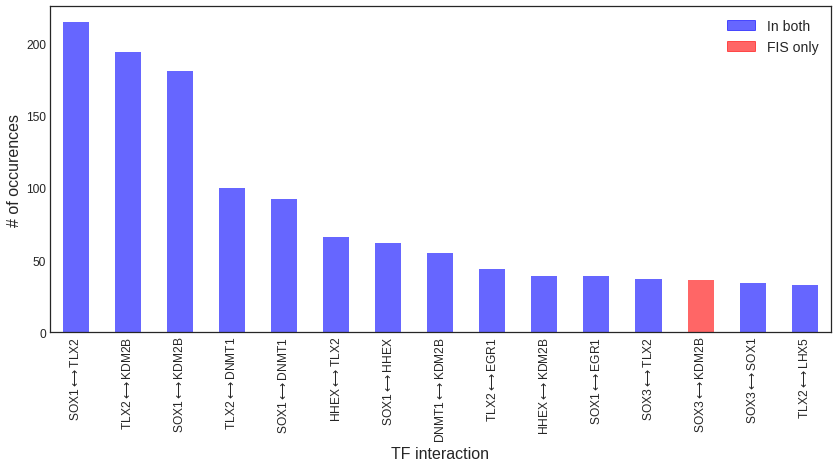

In [38]:
plot_interaction_comparison(df_res, first_n=15, xlabel='TF interaction', store_pdf_path=None, fig_size=(14,6))

### Family interactions analysis

#### Get unique family interactions per method and their intersection

In [39]:
ATTN_unique, DFIM_unique, intersected = get_comparison_stats(DFIM, ATTN, intr_type='Family_Interaction')

In [40]:
print(f"DFIM: {len(set(DFIM_unique.keys()))}, SATORI: {len(set(ATTN_unique.keys()))}, Common: {len(intersected)}")

DFIM: 36, SATORI: 24, Common: 20


#### Comparison plot: family interactions

In [41]:
# The order of the arguments determine which method (used for inferring interactions) is being compared to the other
df_res = common_interaction_stats(DFIM_unique, ATTN_unique)

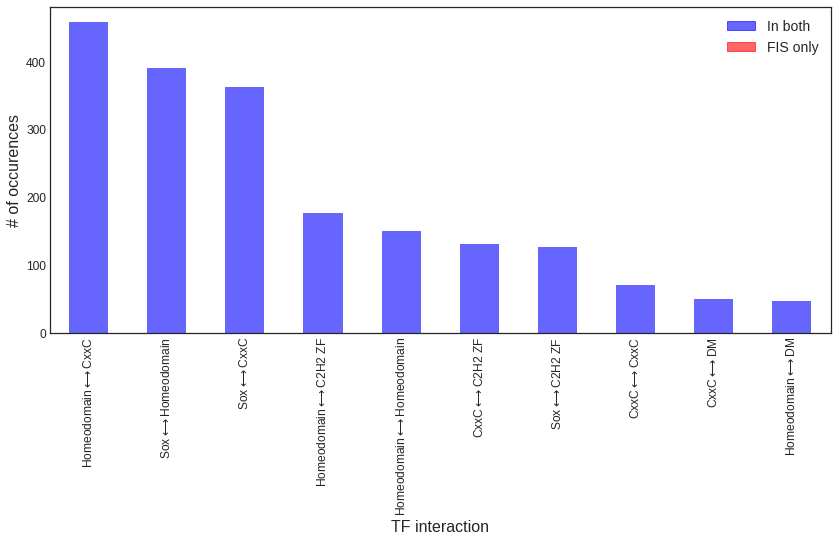

In [42]:
plot_interaction_comparison(df_res, first_n=10, xlabel='Family interaction', store_pdf_path=None, fig_size=(14,6))